# Model Bluiding

## Spliting data

In [9]:
# import function of train_test_splite to splite dataset
from sklearn.model_selection import train_test_split

# Features of data
X = df[["creditscore","numofproducts","balance","genderlabel","ageskewed","isactivemember","geographyfrance","geographygermany","geographyspain"]]

#X = df.drop(columns=["creditscore","geography", "gender", "age","tenure","hascrcard","estimatedsalary","exited","creditscorerange","balancerange","estimatedsalaryrange","tenurerange"])

y = df["exited"]

# Splite dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, stratify=y, random_state=60)

# Display dataset after spliting
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7996, 9)

(7996,)

(2000, 9)

(2000,)

## Smote Oversample

(12734, 9)

(12734,)

(2000, 9)

(2000,)

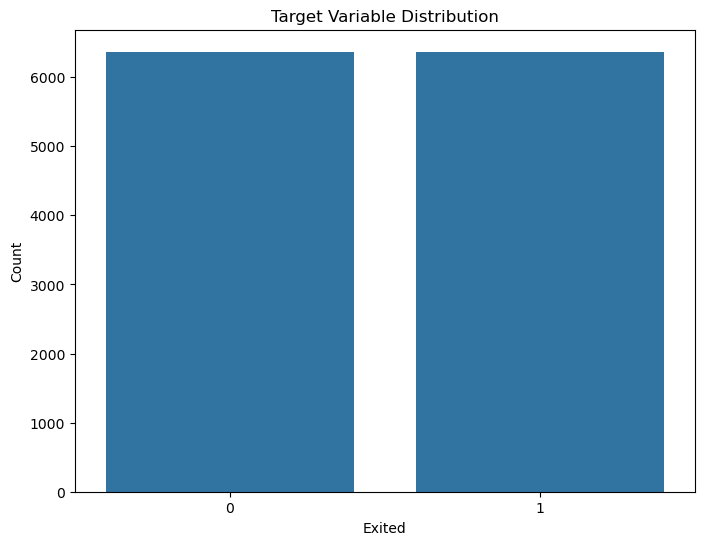

In [13]:
from imblearn.over_sampling import SMOTE

# Over-sampling Technique
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Shaping data after smote it
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# visualize target using bar
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Target Variable Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

## Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler

#  Create Scaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


## Training Model XGBoost

In [37]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Create Best Model
model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.05,
    max_depth=6,
    n_estimators=300,
    scale_pos_weight=5,
    subsample=0.8,
    #eval_metric='logloss',
    random_state=60
)

# Train Model
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluate Model

In [89]:
# Evaluate Model6 xgboost
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred = model.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred))

# Predict Model Test
y_test_pred = model.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred))


 Confusion_matrix training 

 [[5019 1348]
 [ 110 6257]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.98      0.79      0.87      6367
           1       0.82      0.98      0.90      6367

    accuracy                           0.89     12734
   macro avg       0.90      0.89      0.88     12734
weighted avg       0.90      0.89      0.88     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1174  418]
 [  76  332]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.94      0.74      0.83      1592
           1       0.44      0.81      0.57       408

    accuracy                           0.75      2000
   macro avg       0.69      0.78      0.70      2000
weighted avg       0.84      0.75      0.77      2000



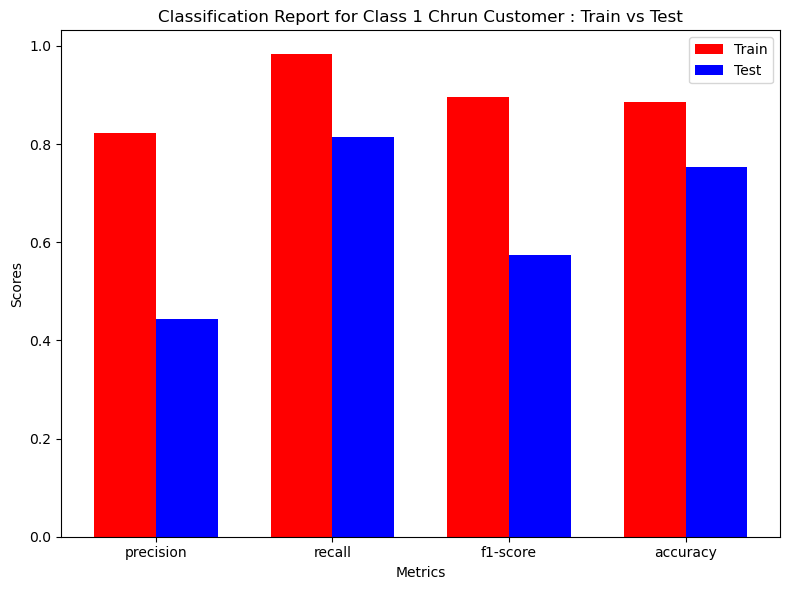

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Generate classification report for train and test sets
train_class_report = classification_report(y_train, model.predict(X_train_scaled), output_dict=True)
test_class_report = classification_report(y_test, model.predict(X_test_scaled), output_dict=True)  # Use scaled test data

# Extract the metrics for class "1" only
train_class_1 = train_class_report['1']  # Metrics for class "1" in the training set
test_class_1 = test_class_report['1']    # Metrics for class "1" in the test set

# Extract accuracy for both training and test sets
train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))

# Prepare data for plotting
categories = ['precision', 'recall', 'f1-score', 'accuracy']
train_values = [train_class_1['precision'], train_class_1['recall'], train_class_1['f1-score'], train_accuracy]
test_values = [test_class_1['precision'], test_class_1['recall'], test_class_1['f1-score'], test_accuracy]

# Set up the bar chart
x = np.arange(len(categories))  # The x positions for the bars
width = 0.35  # The width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for training set (red color)
ax.bar(x - width / 2, train_values, width, label='Train', color='red')

# Plot bars for test set (blue color)
ax.bar(x + width / 2, test_values, width, label='Test', color='blue')

# Add labels, title, and x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Classification Report for Class 1 Chrun Customer : Train vs Test')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


## Draw ROC and AUC

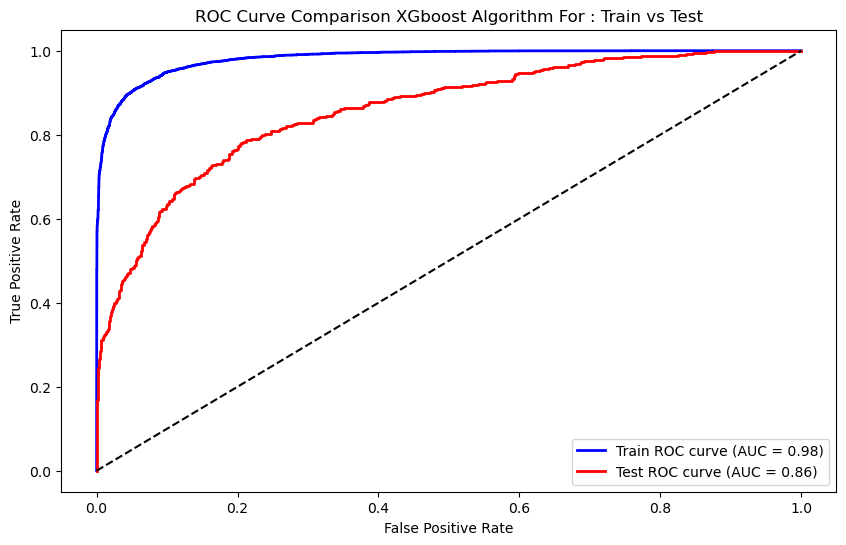

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the training and test sets
y_train_pred_prob = model.predict_proba(X_train_scaled)[:, 1]  # Use scaled training set
y_test_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Use original test set

# Calculate FPR and TPR for both train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)

# Calculate AUC for both train and test sets
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for both training and test sets
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison XGboost Algorithm For : Train vs Test')
plt.legend(loc='lower right')
plt.show()
